In [1]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [2]:
weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X + bias

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={'size': 14})

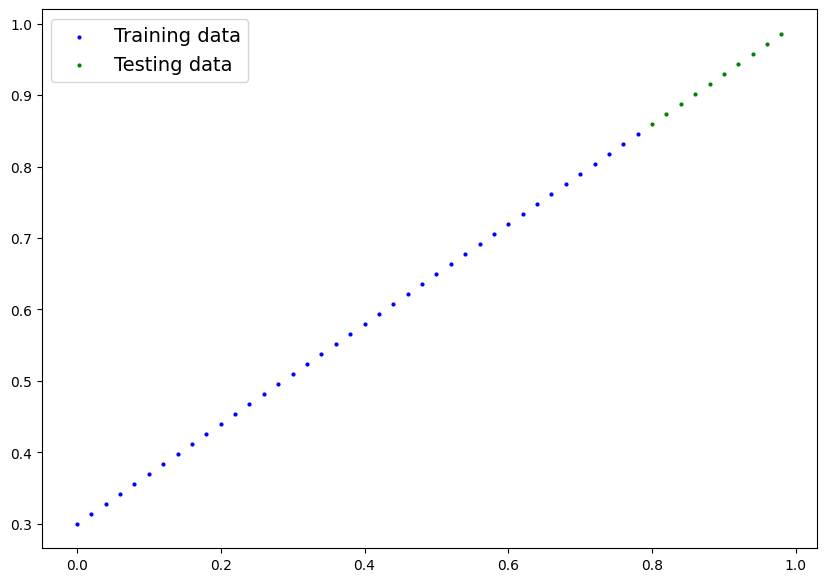

In [6]:
plot_predictions()

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(
        in_features=1,
        out_features=1
    )

  def forward(self, x: torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3117]])),
             ('linear_layer.bias', tensor([-0.2612]))])

In [9]:
next(model_1.parameters()).device

device(type='cpu')

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_1.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [8]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01,
                            momentum=0.9)

In [12]:
torch.manual_seed(42)

epochs = 100
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  train_pred = model_1(X_train)
  loss = loss_fn(train_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')

Epoch: 0 | Loss: 0.7010880708694458 | Test Loss: 0.8676802515983582
Epoch: 10 | Loss: 0.15680208802223206 | Test Loss: 0.16020146012306213
Epoch: 20 | Loss: 0.17784924805164337 | Test Loss: 0.10095109790563583
Epoch: 30 | Loss: 0.08655711263418198 | Test Loss: 0.1302376538515091
Epoch: 40 | Loss: 0.024614039808511734 | Test Loss: 0.0896417498588562
Epoch: 50 | Loss: 0.011560116894543171 | Test Loss: 0.04636291414499283
Epoch: 60 | Loss: 0.0033990591764450073 | Test Loss: 0.006912922952324152
Epoch: 70 | Loss: 0.004062950611114502 | Test Loss: 0.0005409180885180831
Epoch: 80 | Loss: 0.004273981787264347 | Test Loss: 0.0027280866634100676
Epoch: 90 | Loss: 0.004592441022396088 | Test Loss: 0.0020082294940948486


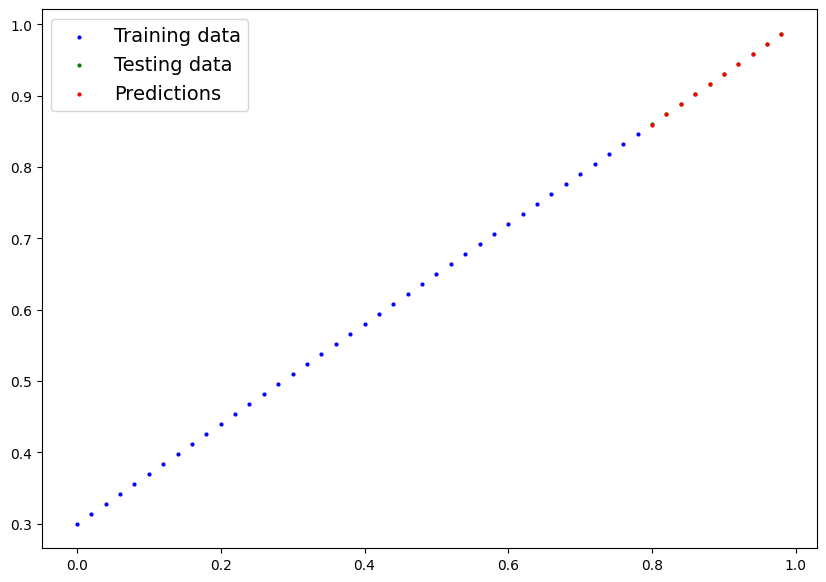

In [14]:
with torch.inference_mode():
  y_pred = model_1(X_test)

plot_predictions(predictions=y_pred)

In [15]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = MODEL_PATH / 'pytorch_linear_model.pth'
torch.save(obj=model_1.state_dict(),
           f=MODEL_NAME)

In [17]:
loaded_model_1 = LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(MODEL_NAME))
loaded_model_1.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [18]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7066]])),
             ('linear_layer.bias', tensor([0.2944]))])